In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1D Ising model + Transfer matrix

* Construct the transfer matrix at temperature $T$ with external field $B$
* Find the eivenvalues of the transfer matrix and compare to the exact results.
* Evaluate the partition function $Z$ at different system size $N$ and $T$, $B$. Compare to the exact results.
* For a fixed $N$, $T$, $B$, evaluate $\langle S_0 S_j\rangle$ where $j=0,1,\cdots N$. 
* Plot $\langle S_0 S_j\rangle$ up to $j=N/2$ and show that it decays exponentially.
  * Please try several $N$, $T$, $B$. What is the largest $N$ you can go? What is the lowest $T$ you can go?

In [2]:
t     = 1
kb    = 1
beta  = 1/t/kb
B     = 0
N     = 32
J    =  1

In [3]:
T = np.array([[np.exp(J*beta+B*beta),np.exp(-J*beta)],[np.exp(-J*beta),np.exp(J*beta-B*beta)]])

e_vals,e_vecs = np.linalg.eig(T)
e_vals

array([3.08616127, 2.35040239])

In [4]:
z = np.array([[1,0],[0,1]])

for i in range(N):
    z = z.dot(T)
    
print(np.trace(z))
print(e_vals[0]**N+ e_vals[1]**N)

4586347990689702.0
4586347990689702.0


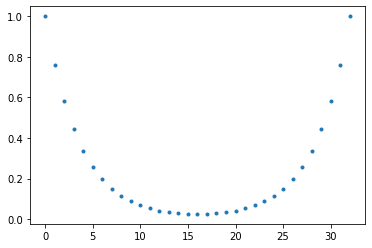

In [5]:
result = np.zeros(N+1)
z0 = np.array([[1,0],[0,-1]])
for j in range(N):
    z_s0sj = z0
    z = np.array([[1,0],[0,1]])
    for i in range(N):
        z = z.dot(T)
        if i==j:
            z_s0sj = z_s0sj.dot(z0).dot(T)
        else :
            z_s0sj = z_s0sj.dot(T)    
    result[j] = np.trace(z_s0sj)/np.trace(z)
result[N]=result[0]
plt.plot(result,'.')

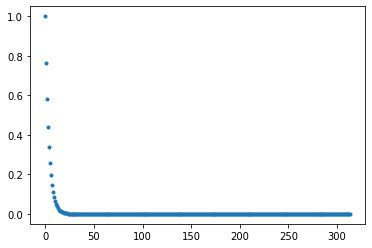

In [6]:
N = 629
result = np.zeros(N+1)
z0 = np.array([[1,0],[0,-1]])
for j in range(N):
    z_s0sj = z0
    z = np.array([[1,0],[0,1]])
    for i in range(N):
        z = z.dot(T)
        if i==j:
            z_s0sj = z_s0sj.dot(z0).dot(T)
        else :
            z_s0sj = z_s0sj.dot(T)    
    result[j] = np.trace(z_s0sj)/np.trace(z)
result[N]=result[0]
plt.plot(result[0:N//2],'.')

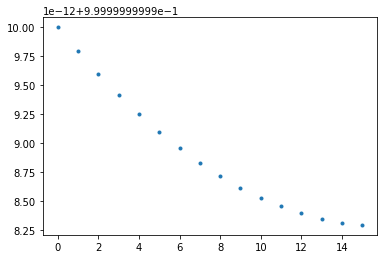

In [7]:
t     = 0.12
kb    = 1
beta  = 1/t/kb
N     = 32

T = np.array([[np.exp(J*beta+B*beta),np.exp(-J*beta)],[np.exp(-J*beta),np.exp(J*beta-B*beta)]])
result = np.zeros(N+1)
z0 = np.array([[1,0],[0,-1]])
for j in range(N):
    z_s0sj = z0
    z = np.array([[1,0],[0,1]])
    for i in range(N):
        z = z.dot(T)
        if i==j:
            z_s0sj = z_s0sj.dot(z0).dot(T)
        else :
            z_s0sj = z_s0sj.dot(T)    
    result[j] = np.trace(z_s0sj)/np.trace(z)
result[N]=result[0]
plt.plot(result[0:N//2],'.')